In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers,datasets

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0


4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names =['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']

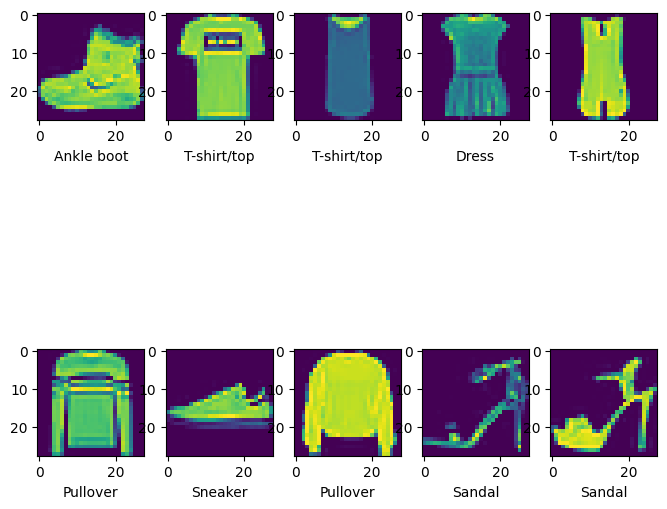

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks()
  plt.yticks()
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()



In [6]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1688/1688 [==============================] - 63s 36ms/step - loss: 2.3731 - accuracy: 0.1012 - val_loss: 2.3026 - val_accuracy: 0.1055
Epoch 2/5
1688/1688 [==============================] - 51s 30ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1055
Epoch 3/5
1688/1688 [==============================] - 52s 31ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1055
Epoch 4/5
1688/1688 [==============================] - 50s 30ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1055
Epoch 5/5
1688/1688 [==============================] - 51s 30ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1055


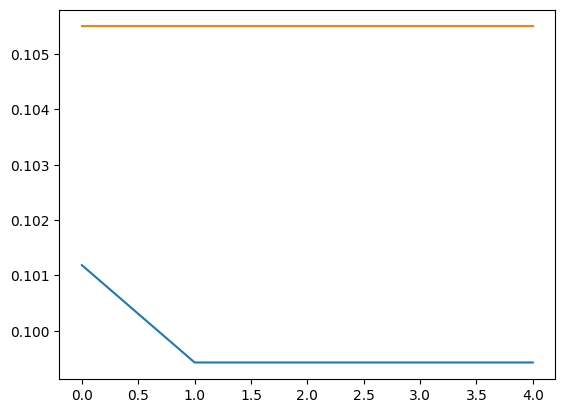

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

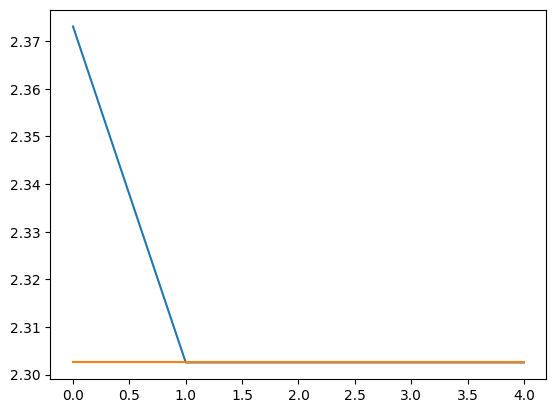

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [15]:
import numpy as np
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([4, 4, 4, ..., 4, 4, 4])

In [16]:
y_pred1[1]

4

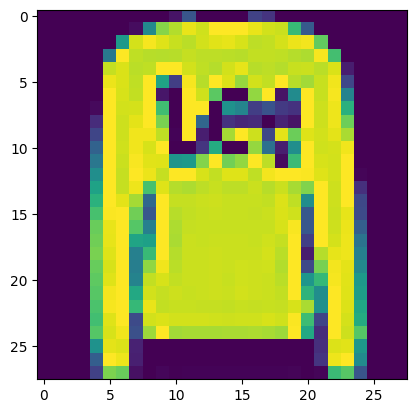

In [17]:
plt.imshow(x_test[1])

In [18]:
class_names[y_test[1]]

'Pullover'